<a href="https://colab.research.google.com/github/Kunal3012/ML-Alogorithms/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction on Pima Indians Diabetes Database using Naive Bayes

In [ ]:
# importing all the necessary packages 
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data set 
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv')

In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Lets check the dimension of the data set 
data.shape

(768, 9)

In [ ]:
# Printing the first 5 records of the data set 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The count of records for all the columns is 768, this indicates that there are no blank columns in the data set. 

In [ ]:
# Since all the predictor columns are continuous in nature, there might be a chance that 0's 
#in these columns indicate missing data. 

# Lets check the above claim.

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above description of the data, we can see that columns - 
Pregnancies, Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have minimum values of 0. 
It makes sense to have 0 prgnancies, but the it does not make sense for other mentioned variables to have a minimum value of 0.
So we can conclude that Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data. 
The 0's in these columns should be replaced with the median, since the median is least affected by outliers. 

In [ ]:
# Replacing the 0's with NaN.
# The records that have 0's in columns Glucose, Blood Preassure, Skin Thickness, Insulin and BMI will be replaced with NaN 
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)


In [ ]:
#Lets check if the above code has worked 
data.head()
# All the 0's have been replaced by NaN

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
data.head().isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
# Count of NaN values in the dataset 
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
# Imputing missing values with their respective columns median
data.fillna(data.median(), inplace=True)

In [ ]:
# Checking if the missing values have been imputed 
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: >

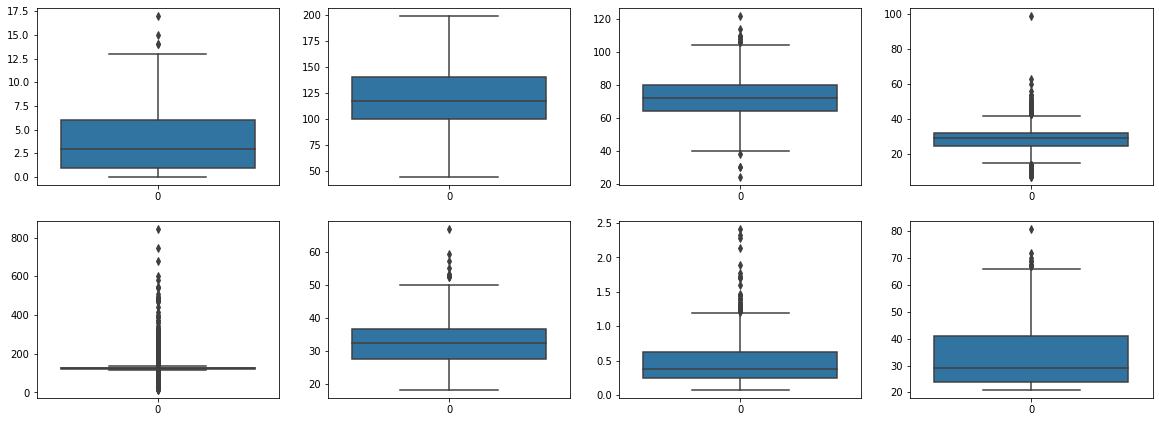

In [ ]:
# Outlier detection using boxplots 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

Apart from 'Glucose' all the other attributes show preasence of outliers. 
These lower level and upper level outliers will be replaced by the 5th and 95th percentile respectively.

In [ ]:
data['Pregnancies']=data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05), upper=data['Pregnancies'].quantile(0.95))
data['BloodPressure']=data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05), upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05), upper=data['SkinThickness'].quantile(0.95))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.05), upper=data['Insulin'].quantile(0.95))
data['BMI']=data['BMI'].clip(lower=data['BMI'].quantile(0.05), upper=data['BMI'].quantile(0.95))
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05), upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05), upper=data['Age'].quantile(0.95))

<Axes: >

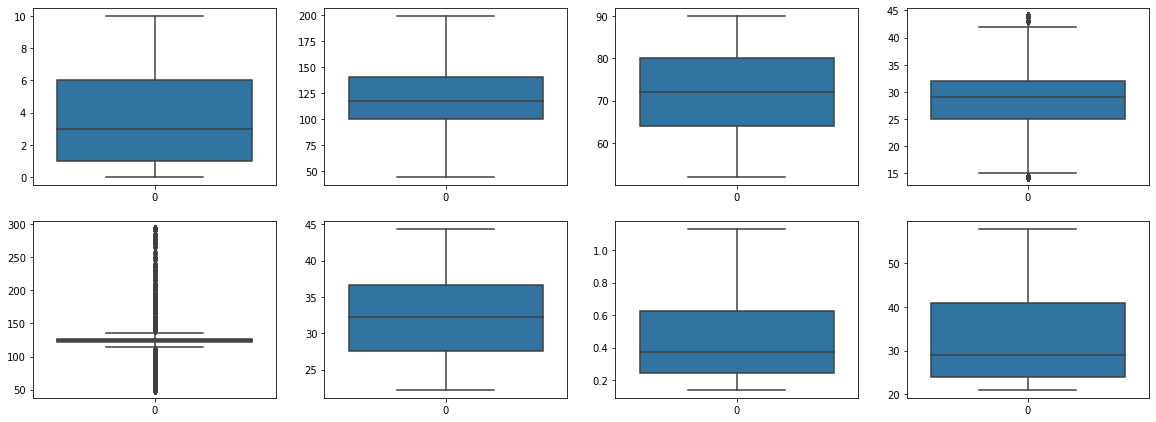

In [ ]:
# Lets visualise the boxplots after imputing the outliers 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

In [ ]:
# As we can see, there are still outliers in columns Skin Thickness and Insulin. Lets try manipulating the percentile values.
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.07), upper=data['SkinThickness'].quantile(0.93))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.21), upper=data['Insulin'].quantile(0.80))
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
sns.boxplot(data['SkinThickness'])
plt.subplot(2,2,2)
sns.boxplot(data['Insulin'])

The outliers of Skin Thickness were treated by minor changes in the percentiles but the outliers of insulin require a major changes in the percentiles. This might result in too much data manipulation, which migh jepordise the models.

Attribute Insulin might have to be removed from the data set.

#  Data Visualisation

In [ ]:
# Lets start by understanding the distribution diabitic Vs Non Diabitic patients in the data set.

sns.countplot(data['Outcome'])

From the above plot we can infer that majority of the data consists of Non Diabetic Patients. 
Lets try to understand the percentage distribution of Diabetic Vs Non Diabetic in the data set. 

In [ ]:
total=float(len(data))
ax = sns.countplot(x="Outcome", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [ ]:
# Pair plot analysis 
sns.pairplot(data,hue='Outcome',diag_kind='kde')

In [ ]:
data.columns

In [ ]:
from sklearn.model_selection import train_test_split
x= data.drop(['Outcome'],axis =1)
y=data['Outcome']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
model.fit(xTrain,yTrain)

In [ ]:
predicted= model.predict(xTest)

In [ ]:
print("Predicted Value:", predicted)

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, predicted))